downloading files data.py and models.py

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset,ConcatDataset
import torch.nn as nn
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from models import LeNet,LeNet_BatchNorm
from data import read_data,prepare_data_loader,tiny_image_net,EMD
from gan import gan
from encoder_decoder import *
from train import *
from test import *

download data set and prepare loaders

In [ ]:
class extend:
  def __call__(self,sample):
    x=sample.view((1,3,32,32))
    return x

if not os.path.isfile('/content/cifar-10-python.tar.gz'):
  !wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
  !tar -xf /content/cifar-10-python.tar.gz

if not os.path.isfile('/content/tiny-imagenet.zip'):
  !kaggle datasets download -d akash2sharma/tiny-imagenet
  !unzip /content/tiny-imagenet.zip

train_transform = transforms.Compose([
                                      
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalizes tensor with mean and standard deviation
])

trans_imagenet=transforms.Compose([transforms.Resize((32,32)),
                                      transforms.ToTensor(),
                                      extend()
                                      ])

data_imagenet=tiny_image_net('tiny-imagenet-200',trans_imagenet,0.5)
 
data=read_data('/content/cifar-10-batches-py')# return a list with all the data 



loaders=prepare_data_loader(data,train_transform,alpha=100,validation_fraction=0.2) # the validation set if specified will be the last element in the loader
loader_imagenet=prepare_data_loader(data_imagenet,train_transform)


In [ ]:
#generator=gan(400,loader_imagenet[0])

generator=gan(120,loader_imagenet[0],Nz=100,Ndf=128,Ngf=128)
#generator.load_state_dict(torch.load('gan_model')())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[0/120][0/196]	Loss_D: 1.3821	Loss_G: 7.6271	D(x): 0.4920	D(G(z)): 0.4749 / 0.0006
[0/120][50/196]	Loss_D: 0.6105	Loss_G: 4.1535	D(x): 0.7435	D(G(z)): 0.1489 / 0.0259
[0/120][100/196]	Loss_D: 0.6437	Loss_G: 6.7392	D(x): 0.9634	D(G(z)): 0.4135 / 0.0041
[0/120][150/196]	Loss_D: 1.7500	Loss_G: 0.4408	D(x): 0.2497	D(G(z)): 0.0476 / 0.6762
[1/120][0/196]	Loss_D: 0.8744	Loss_G: 5.0586	D(x): 0.8955	D(G(z)): 0.5024 / 0.0106
[1/120][50/196]	Loss_D: 0.6155	Loss_G: 3.2954	D(x): 0.6952	D(G(z)): 0.1371 / 0.0485
[1/120][100/196]	Loss_D: 0.9055	Loss_G: 3.3424	D(x): 0.8282	D(G(z)): 0.4512 / 0.0517
[1/120][150/196]	Loss_D: 0.4666	Loss_G: 3.1848	D(x): 0.8038	D(G(z)): 0.1911 / 0.0485
[2/120][0/196]	Loss_D: 0.6740	Loss_G: 3.4695	D(x): 0.7715	D(G(z)): 0.2961 / 0.0366
[2/120][50/196]	Loss_D: 1.3616	Loss_G: 4.2576	D(x): 0.8200	D(G(z)): 0.6453 / 0.0193
[2/120][100/196]	Loss_D: 0.9324	Loss_G: 2.3431	D(x): 0.6122	D(G(z)): 0.2694 / 0.1238
[2/120][150/196]	Loss_D: 0.8420	Loss_G: 3.5716	D(x): 0.7380	D(G(z)): 0.371

In [ ]:
decoder,mean_tiny_img_net,cov_tiny_img_net=train_encoder_decoder(120,loader_imagenet[0],Device='cuda')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


	 partial train loss (single batch): 0.278647
0
[0.01, 0.01]
	 partial train loss (single batch): 0.274958
	 partial train loss (single batch): 0.271766
	 partial train loss (single batch): 0.243364
	 partial train loss (single batch): 0.208815
	 partial train loss (single batch): 0.203203
	 partial train loss (single batch): 0.200727
	 partial train loss (single batch): 0.199539
	 partial train loss (single batch): 0.198325
	 partial train loss (single batch): 0.197320
	 partial train loss (single batch): 0.196710
	 partial train loss (single batch): 0.196128
	 partial train loss (single batch): 0.195778
	 partial train loss (single batch): 0.195634
	 partial train loss (single batch): 0.195364
	 partial train loss (single batch): 0.195059
	 partial train loss (single batch): 0.194981
	 partial train loss (single batch): 0.194904
	 partial train loss (single batch): 0.194738
	 partial train loss (single batch): 0.195021
	 partial train loss (single batch): 0.194820
	 partial train los

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-0.8197, -0.6037, -0.0826,  ..., -0.5931, -0.5191, -0.2834],
          [-0.5136,  0.0108,  0.1532,  ..., -0.6099, -0.4130, -0.0991],
          [-0.3037, -0.2971, -0.1879,  ..., -0.5616, -0.3407,  0.1460],
          ...,
          [-0.9074, -0.9094, -0.9144,  ...,  0.7556,  0.6582, -0.0970],
          [-0.8883, -0.9560, -0.9629,  ...,  0.8450,  0.8019,  0.0035],
          [-0.9956, -0.9701, -0.9596,  ...,  0.8704,  0.8171,  0.6388]],

         [[-0.7075, -0.6227, -0.4798,  ..., -0.3150, -0.2661,  0.1126],
          [-0.6151, -0.5872, -0.5261,  ..., -0.3979, -0.1610,  0.1962],
          [-0.3957, -0.5232, -0.5837,  ..., -0.4294, -0.0689,  0.3074],
          ...,
          [-0.6678, -0.7384, -0.7710,  ...,  0.9090,  0.9067,  0.5737],
          [-0.6550, -0.8400, -0.8479,  ...,  0.9443,  0.9463,  0.7919],
          [-0.9821, -0.8645, -0.9179,  ...,  0.9594,  0.9709,  0.9212]],

         [[-0.8142, -0.8779, -0.7252,  ..., -0.3603, -0.2730,  0.2695],
          [-0.7697, -0.5446, -

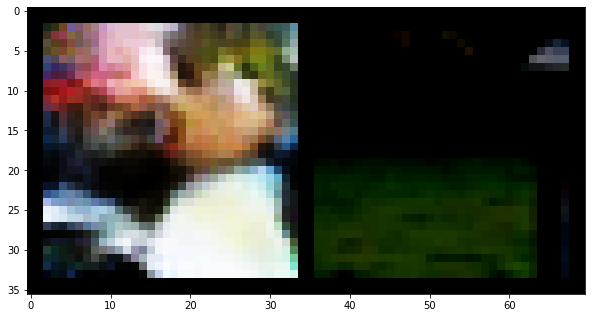

In [ ]:
import torchvision.utils as vutils
#z=torch.from_numpy(np.random.multivariate_normal(mean_tiny_img_net,cov_tiny_img_net).astype(np.float32))
#decoder.train(False)
#z=torch.normal(torch.zeros((1,128,1,1)),1)

#z=z.view((1,128,1,1))
#d3=decoder(z.to('cuda'))

z=torch.randn(1, 100, 1, 1)
z=z.to('cuda')
d3=generator(z)
d3=d3/(d3.max())
print(d3)

d3-=d3.min()
d3=d3/d3.max()
plt.figure(figsize=(10,10))

d5=loader_imagenet[0].dataset[27][0].to('cpu').view((1,3,32,32))
d5=d5/(d5.max()-d5.min())
plt.imshow(np.transpose(vutils.make_grid(torch.cat((d3[0].to('cpu').view((1,3,32,32)),
                              d5)),
                                padding=2 ),(1,2,0)))


#learning rate tuning

learning rate hyperparameter tuning for 20 epochs in centralized setting

In [ ]:
learning_rates=[0.2,0.15,0.1,0.08,0.06,0.05,0.04,0.02,0.01,0.005]
weight_decay=10**-4
loss=nn.CrossEntropyLoss()
results=[]
acc_val=[]
z=0
for lr in learning_rates:
  net=LeNet(3,10)
  net.to('cuda')

  optimizer=torch.optim.SGD(net.parameters(),lr,weight_decay)
  for i in range(30):
    lo,acc=train(net,loaders[0],optimizer,loss,'cuda')
    if(i==29):
      z=z+1
      results.append(f'lr= {lr}: loss= {lo}, acc= {acc}')
      print(f'step {z} out of {len(learning_rates)}')
  acc_val.append(test(net,loaders[1],'cuda'))

torch.save({'acc_val':acc_val,'training':results},'parameter-tuning')

#weight and loss def

In [ ]:
weight_decay=10**-4
loss=nn.CrossEntropyLoss()

#centralized

training loop for 120 epochs centralized

torch.Size([40000, 3, 32, 32])
torch.Size([10000, 3, 32, 32])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


step 0 out of 120
step 1 out of 120
step 2 out of 120
step 3 out of 120
step 4 out of 120
step 5 out of 120
step 6 out of 120
step 7 out of 120
step 8 out of 120
step 9 out of 120
step 10 out of 120
step 11 out of 120
step 12 out of 120
step 13 out of 120
step 14 out of 120
step 15 out of 120
step 16 out of 120
step 17 out of 120
step 18 out of 120
step 19 out of 120
step 20 out of 120
step 21 out of 120
step 22 out of 120
step 23 out of 120
step 24 out of 120
step 25 out of 120
step 26 out of 120
step 27 out of 120
step 28 out of 120
step 29 out of 120
step 30 out of 120
step 31 out of 120
step 32 out of 120
step 33 out of 120
step 34 out of 120
step 35 out of 120
step 36 out of 120
step 37 out of 120
step 38 out of 120
step 39 out of 120
step 40 out of 120
step 41 out of 120
step 42 out of 120
step 43 out of 120
step 44 out of 120
step 45 out of 120
step 46 out of 120
step 47 out of 120
step 48 out of 120
step 49 out of 120
step 50 out of 120
step 51 out of 120
step 52 out of 120
ste

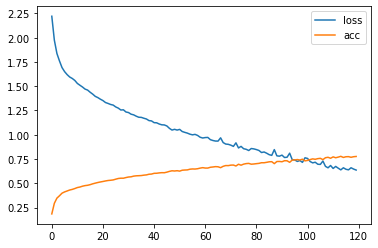

In [ ]:
net=LeNet(3,10)
net.to('cuda')
lo,acc=[],[]
loaders=prepare_data_loader(data,train_transform,validation_fraction=0.2)
optimizer=torch.optim.SGD(net.parameters(),0.1,weight_decay)
for i in range(120):
  x,y=train(net,loaders[0],optimizer,loss,'cuda')
  print(f'step {i} out of 120')
  lo.append(x)
  acc.append(y)
accuracy=test(net,loaders[1],'cuda')
plt.plot(range(120),lo,label='loss')
plt.plot(range(120),acc,label='acc')
plt.legend()

In [ ]:
accuracy

0.4817

#federated_learning

In [ ]:
def federated_training(data,model='LeNet',nbclients=20,alpha=10000,lr=0.1,epoch=1,clients_per_round=0.2,val_fraction=0.2,
                       transform=train_transform,nb_rounds=120,mu=0.1,wr=1,fr=0.5,cycle=True,mode='fedAvg',generation_model=None):
  NbClients=nbclients # data distributed over 20 clients
  Alpha=alpha # iid condition 
  NbClientsPerRound=clients_per_round # fraction of clients unfiformly choosen at each round
  E=epoch # local epoch
  Lr=lr # learning rate
  TotalRounds=nb_rounds
  if(mode=='fedExt'):
    nb_out=11
  else:
    nb_out=10

  loss_total=[]

  if model=='LeNet':
    server_model=LeNet(3,nb_out)
    client_models=[LeNet(3,nb_out) for i in range(NbClients)]
  else:
    server_model=LeNet_BatchNorm(3,nb_out)
    client_models=[LeNet_BatchNorm(3,nb_out) for i in range(NbClients)]

  mock_string=mode if mode=='fedAvg' else mode+' '+str(mu)
  file=f'/content/{model}_federated_{mock_string}_param_{epoch}_{Alpha}_{NbClientsPerRound}_{lr}' # to save and load the state of the model after each round in case of failure , mark that saving which round and the loaders is also necessary

  if not os.path.isfile(file):
    loaders=prepare_data_loader(data,transform,validation_fraction=val_fraction,centralized=False,nb_clients=NbClients,alpha=Alpha)
    if(cycle==False and mode=='fedExt'):
      for j in range(len(loaders[:-1])):
        loaders[j]=copy.deepcopy(mix_generate(loaders[j],fr,generation_model))
    len_loaders=[len(i.dataset) for i in loaders]
    
    checkpoint={'round': 0, 'server_model': server_model.state_dict(), 'loaders': (loaders,len_loaders),'loss':loss_total}
    torch.save(checkpoint,file)

  checkpoint=copy.deepcopy(torch.load(file)) # load the previous weights or states in case of internet connection /session  problem continue from last round
  server_model.load_state_dict(checkpoint['server_model'])
  server_model.to('cuda')
  loaders,len_loaders=checkpoint['loaders']
  loss_total=copy.deepcopy(checkpoint['loss'])
  ###
  p=[0]*10
  for i,j in loaders[-1]:
    for k in j:
      p[k]+=1
  p=np.array(p)
  p=p/p.sum()
  ####
  for model in client_models:
    model.load_state_dict(checkpoint['server_model'])

  for Round in range(checkpoint['round'],TotalRounds): # begining of federated training
    
    choosen_indexes=np.random.choice(list(range(len(client_models))),round(NbClients*NbClientsPerRound)) # randomly choose clients to participate in this training round
    choosen_models=[client_models[i] for i in choosen_indexes]
    choosen_loaders=[loaders[i] for i in choosen_indexes]
    choosen_weights=np.array([len_loaders[i] for i in choosen_indexes])
    choosen_weights=choosen_weights/choosen_weights.sum() # weighting client depending on ni/n (ni nb samples the client have/ n total nb of sample in this round)
    client_optimizers=[optim.SGD(model.parameters(),Lr,weight_decay) for model in choosen_models] #initialize optimizers (needed because oof the communication step maybe where clients model get the agggregated serever one maybe ???)
    
    loss_models=[]
    for i,model in enumerate(choosen_models):
      for epoch in range(E):
        if(mode=='fedAvg'):
          c,_=train(model,choosen_loaders[i],client_optimizers[i],loss,'cuda')
        else:
          if(mode=='fedProx'):
            c,_=train_fedprox(server_model,model,choosen_loaders[i],client_optimizers[i],loss,mu,'cuda')
          else:
            if(mode=='fedExt'):
              c,_=train_EXT(model,choosen_loaders[i],client_optimizers[i],wr,fr,'cuda',generation_model,cycle)
            else:
              c,_=train_IR(model,choosen_loaders[i],client_optimizers[i],loss,p,'cuda')
        if(epoch==E-1):
          loss_models.append(c)
    loss_models=np.array(loss_models).mean()
    loss_total.append(loss_models)


    avg_weights=communication(server_model,choosen_models,choosen_weights,len(choosen_indexes))
    checkpoint['server_model']=copy.deepcopy(avg_weights)
    checkpoint['round']=Round+1
    checkpoint['loss']=loss_total
    torch.save(checkpoint,file)

    for model in client_models:# update all models with the new weights
      model.load_state_dict(checkpoint['server_model'])
    server_model.load_state_dict(checkpoint['server_model'])
    if(Round%10==0):
      print(f'round {Round} of {TotalRounds}')
  return server_model,loaders,loss_total


#fedavg experiments

In [ ]:
acc=[]
loss_total=[]
for i in [0.01,0.1,1,10,100,1000]:
  model,loader,z=federated_training(data,alpha=i,clients_per_round=0.2,nbclients=20,nb_rounds=120)
  x=test(model,loader[-1],'cuda')
  acc.append(x)
  loss_total.append(z)

In [ ]:
#acc# alpha 1
from google.colab import files
accuracy_per_case={}
for i,j,k in zip(acc,loss_total,[0.01,0.1,1,10,100,1000]):
  accuracy_per_case[f'alpha={k}, clients_per_round=0.2, nbclients=20, acc']=i
  accuracy_per_case[f'alpha={k}, clients_per_round=0.2, nbclients=20, loss']=j
torch.save(accuracy_per_case,'accuracy_alpha')
files.download('accuracy_alpha')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

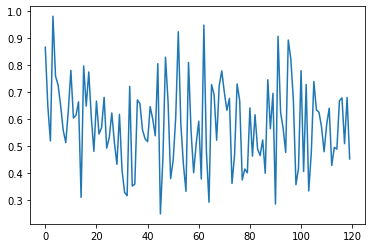

In [ ]:
plt.plot(list(range(120)),torch.load('accuracy_alpha')['alpha=0.1, clients_per_round=0.2, nbclients=20, loss'])

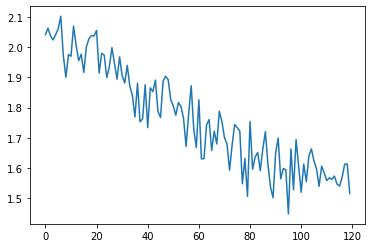

In [ ]:
plt.plot(list(range(120)),torch.load('accuracy_alpha')['alpha=10, clients_per_round=0.2, nbclients=20, loss'])

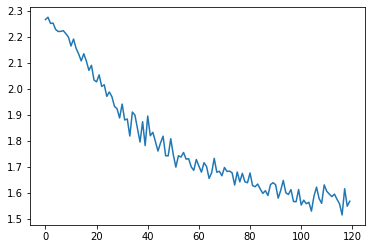

In [ ]:
plt.plot(list(range(120)),torch.load('accuracy_alpha')['alpha=100, clients_per_round=0.2, nbclients=20, loss'])

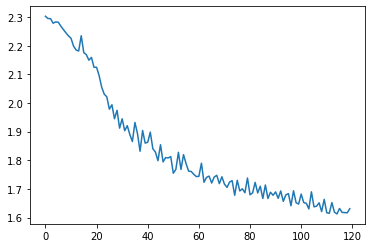

In [ ]:
plt.plot(list(range(120)),torch.load('accuracy_alpha')['alpha=1000, clients_per_round=0.2, nbclients=20, loss'])

#fed_parameter variation

In [ ]:
#[10,5,1,0.5,0.1,0.05]
# for this experiments 60 rounds
#[0.2],[0.4],[0.6],[0.8]
#epch [1,2,5]
from google.colab import files
acc=[]
loss_total=[]
alph=100
accuracy_per_case={}
cl_round=[0.2,0.4,0.6,0.8]
e=1
for i in cl_round:
  model,loader,z=federated_training(data,alpha=alph,clients_per_round=i,epoch=e,nbclients=20,nb_rounds=60)
  x=test(model,loader[-1],'cuda')
  acc.append(x)
  loss_total.append(z)
accuracy_per_case[1]=(acc,loss_total)
string_a=str(e)+' '+str(cl_round)+' '+str(alph)
torch.save(accuracy_per_case,f'accuracy_alpha_e,cl_round,alph,rounds=60{string_a}')
files.download(f'accuracy_alpha_e,cl_round,alph,rounds=60{string_a}')

#fedir-fedprox-fedavg-fedext

In [ ]:
acc=[[],[],[],[]]
loss_total=[]
alph=0.1
k=300

model_generation={
    'type':'gan',
    'model':generator,
    'Nz':100,
    #'mean':np.zeros(128),
    #'cov':cov_tiny_img_net,
}
'''
for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.1,clients_per_round=0.2,nbclients=20,mode='fedProx',mu=1,nb_rounds=i)
  x=test(model,loader[-1],'cuda')
  acc[0].append(x)
  if i==k-1:
    loss_total.append(z)

for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.1,clients_per_round=0.2,nbclients=20,mode='fedAvg',nb_rounds=i)
  x=test(model,loader[-1],'cuda')
  acc[1].append(x)
  if i==k-1:
    loss_total.append(z)
    
for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.1,clients_per_round=0.2,nbclients=20,mode='fedir',nb_rounds=i)
  x=test(model,loader[-1],'cuda')
  acc[2].append(x)
  if i==k-1:
    loss_total.append(z)
'''
for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.1,clients_per_round=0.2,nbclients=20,mode='fedExt',
                                    generation_model=model_generation,wr=1.5,fr=0.6,nb_rounds=i,cycle=False)
  model2=copy.deepcopy(model)
  model2.L2.weight.data=(model2.L2.weight[:10,:])
  model2.L2.bias.data=model2.L2.bias[:10]
  model2.L2.out_features=10
  x=test(model2,loader[-1],'cuda')
  acc[3].append(x)
  if i==k-1:
    loss_total.append(z)

torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([2000, 3, 32, 32])
torch.Size([10000, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
torch.Size([1200, 3, 32, 32])
round 0 of 1
round 10 of 11


In [ ]:
torch.save({'acc':acc,'loss':loss_total},"")

In [ ]:
plt.plot(range(199),loss_total[0],label='fedProx')
#plt.plot(range(19),loss_total[1],label='fedAvg')
#plt.plot(range(19),loss_total[2],label='fedIR')
#plt.plot(range(19),loss_total[3],label='fedExt')
plt.ylabel('acc')
plt.legend()
plt.figure(figsize=(2, 1), dpi=100)
plt.savefig('acc')

In [ ]:
#plt.plot(range(20),acc[0],label='fedProx')
#plt.plot(range(20),acc[1],label='fedAvg')
#plt.plot(range(20),acc[2],label='fedIR')
plt.plot(range(200),acc[3],label='fedExt')
plt.ylabel('acc')
plt.legend()
plt.figure(figsize=(2, 1), dpi=100)
plt.savefig('acc')

#btch norm lenet

lerning rate

In [ ]:
learning_rates=[0.2,0.15,0.1,0.08,0.06,0.05,0.04,0.02,0.01,0.005]
weight_decay=10**-4
loss=nn.CrossEntropyLoss()
results=[]
acc_val=[]
z=0
for lr in learning_rates:
  net=LeNet_BatchNorm(3,10)
  net.to('cuda')

  optimizer=torch.optim.SGD(net.parameters(),lr,weight_decay)
  for i in range(30):
    lo,acc=train(net,loaders[0],optimizer,loss,'cuda')
    if(i==29):
      z=z+1
      results.append(f'lr= {lr}: loss= {lo}, acc= {acc}')
      print(f'step {z} out of {len(learning_rates)}')
  acc_val.append(test(net,loaders[1],'cuda'))

torch.save({'acc_val':acc_val,'training':results},'parameter-tuning-batch-lenet')

centralized

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


step 0 out of 120
step 1 out of 120
step 2 out of 120
step 3 out of 120
step 4 out of 120
step 5 out of 120
step 6 out of 120
step 7 out of 120
step 8 out of 120
step 9 out of 120
step 10 out of 120
step 11 out of 120
step 12 out of 120
step 13 out of 120
step 14 out of 120
step 15 out of 120
step 16 out of 120
step 17 out of 120
step 18 out of 120
step 19 out of 120
step 20 out of 120
step 21 out of 120
step 22 out of 120
step 23 out of 120
step 24 out of 120
step 25 out of 120
step 26 out of 120
step 27 out of 120
step 28 out of 120
step 29 out of 120
step 30 out of 120
step 31 out of 120
step 32 out of 120
step 33 out of 120
step 34 out of 120
step 35 out of 120
step 36 out of 120
step 37 out of 120
step 38 out of 120
step 39 out of 120
step 40 out of 120
step 41 out of 120
step 42 out of 120
step 43 out of 120
step 44 out of 120
step 45 out of 120
step 46 out of 120
step 47 out of 120
step 48 out of 120
step 49 out of 120
step 50 out of 120
step 51 out of 120
step 52 out of 120
ste

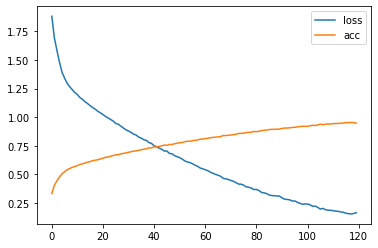

In [ ]:
lr=0.08

net=LeNet_BatchNorm(3,10)
net.to('cuda')
lo,acc=[],[]
optimizer=torch.optim.SGD(net.parameters(),lr,weight_decay)
for i in range(120):
  x,y=train(net,loaders[0],optimizer,loss,'cuda')
  print(f'step {i} out of 120')
  lo.append(x)
  acc.append(y)
accuracy=test(net,loaders[1],'cuda')
plt.plot(range(120),lo,label='loss')
plt.plot(range(120),acc,label='acc')
plt.legend()

In [ ]:
accuracy

0.5325

In [ ]:
acc=[[],[],[],[]]
loss_total=[]
alph=0.1
k=200

model_generation={
    'type':'gan',
    'model':generator,
    'Nz':100,
    #'mean':np.zeros(128),
    #'cov':cov_tiny_img_net,
}
'''
for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.08,model='lenet_batchnorm',clients_per_round=0.2,nbclients=20,mode='fedProx',mu=1,nb_rounds=i)
  x=test(model,loader[-1],'cuda')
  acc[0].append(x)
  if i==k-1:
    loss_total.append(z)

for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.08,model='lenet_batchnorm',clients_per_round=0.2,nbclients=20,mode='fedAvg',nb_rounds=i)
  x=test(model,loader[-1],'cuda')
  acc[1].append(x)
  if i==k-1:
    loss_total.append(z)
    
for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.08,model='lenet_batchnorm',clients_per_round=0.2,nbclients=20,mode='fedir',nb_rounds=i)
  x=test(model,loader[-1],'cuda')
  acc[2].append(x)
  if i==k-1:
    loss_total.append(z)
'''
for i in range(k):
  model,loader,z=federated_training(data,alpha=alph,lr=0.08,model='lenet_batchnorm',clients_per_round=0.2,nbclients=20,mode='fedExt',
                                    generation_model=model_generation,wr=1.5,fr=0.6,nb_rounds=i,cycle=False)
  model2=copy.deepcopy(model)
  model2.L2.weight.data=(model2.L2.weight[:10,:])
  model2.L2.bias.data=model2.L2.bias[:10]
  model2.L2.out_features=10
  x=test(model2,loader[-1],'cuda')
  acc[3].append(x)
  if i==k-1:
    loss_total.append(z)


In [ ]:
plt.plot(range(300),loss_total[0])